In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar
from functions import calculate_climatology, plot_climatology


ds = xr.open_zarr("https://data.dynamical.org/noaa/gfs/analysis-hourly/latest.zarr?email=optional@email.com")
ds


<xarray.Dataset> Size: 1TB
Dimensions:                (time: 82920, latitude: 721, longitude: 1440)
Coordinates:
  * latitude               (latitude) float64 6kB 90.0 89.75 ... -89.75 -90.0
  * longitude              (longitude) float64 12kB -180.0 -179.8 ... 179.8
    spatial_ref            int64 8B ...
  * time                   (time) datetime64[ns] 663kB 2015-01-15 ... 2024-06...
Data variables:
    precipitation_surface  (time, latitude, longitude) float32 344GB dask.array<chunksize=(160, 145, 144), meta=np.ndarray>
    temperature_2m         (time, latitude, longitude) float32 344GB dask.array<chunksize=(160, 145, 144), meta=np.ndarray>
    wind_u_10m             (time, latitude, longitude) float32 344GB dask.array<chunksize=(160, 145, 144), meta=np.ndarray>
    wind_v_10m             (time, latitude, longitude) float32 344GB dask.array<chunksize=(160, 145, 144), meta=np.ndarray>
Attributes:
    attribution:         NOAA NCEP GFS data processed by dynamical.org from N...
    description:         Historical weather data from the Global Forecast Sys...
    id:                  noaa-gfs-analysis-hourly
    name:                NOAA GFS analysis, hourly
    spatial_domain:      Global
    spatial_resolution:  0.25 degrees (~20km)
    time_domain:         2015-01-15 00:00:00 UTC to 2024-07-01 00:00:00 UTC
    time_resolution:     1 hour

In [2]:
sub_ds = ds.isel(time=slice(-8760, None))
#1 year of hourly data

In [ ]:
#with ProgressBar():
   # location_ds = sub_ds.isel(latitude=30, longitude=30).compute()

[########################################] | 100% Completed | 29.47 s


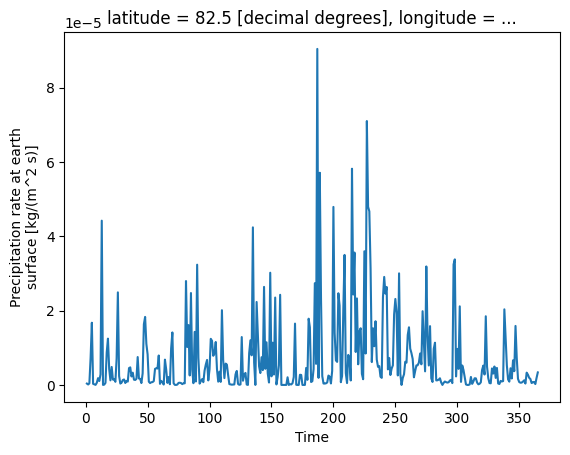

In [ ]:
#clim_ds = location_ds.groupby(location_ds['time'].dt.dayofyear).mean()
#clim_ds['precipitation_surface'].plot()

(<Figure size 1800x1200 with 4 Axes>,
 array([[<Axes: title={'center': 'latitude = 32.25 [decimal degrees], longitude =...'}, xlabel='Time', ylabel='Temperature 2 meters above\nearth surface [C]'>,
         <Axes: title={'center': 'latitude = 32.25 [decimal degrees], longitude =...'}, xlabel='Time', ylabel='Precipitation rate at earth\nsurface [kg/(m^2 s)]'>],
        [<Axes: title={'center': 'latitude = 32.25 [decimal degrees], longitude =...'}, xlabel='Time', ylabel='Wind speed u-component 10\nmeters above earth surface\n[m/s]'>,
         <Axes: title={'center': 'latitude = 32.25 [decimal degrees], longitude =...'}, xlabel='Time', ylabel='Wind speed v-component 10\nmeters above earth surface\n[m/s]'>]],
       dtype=object))

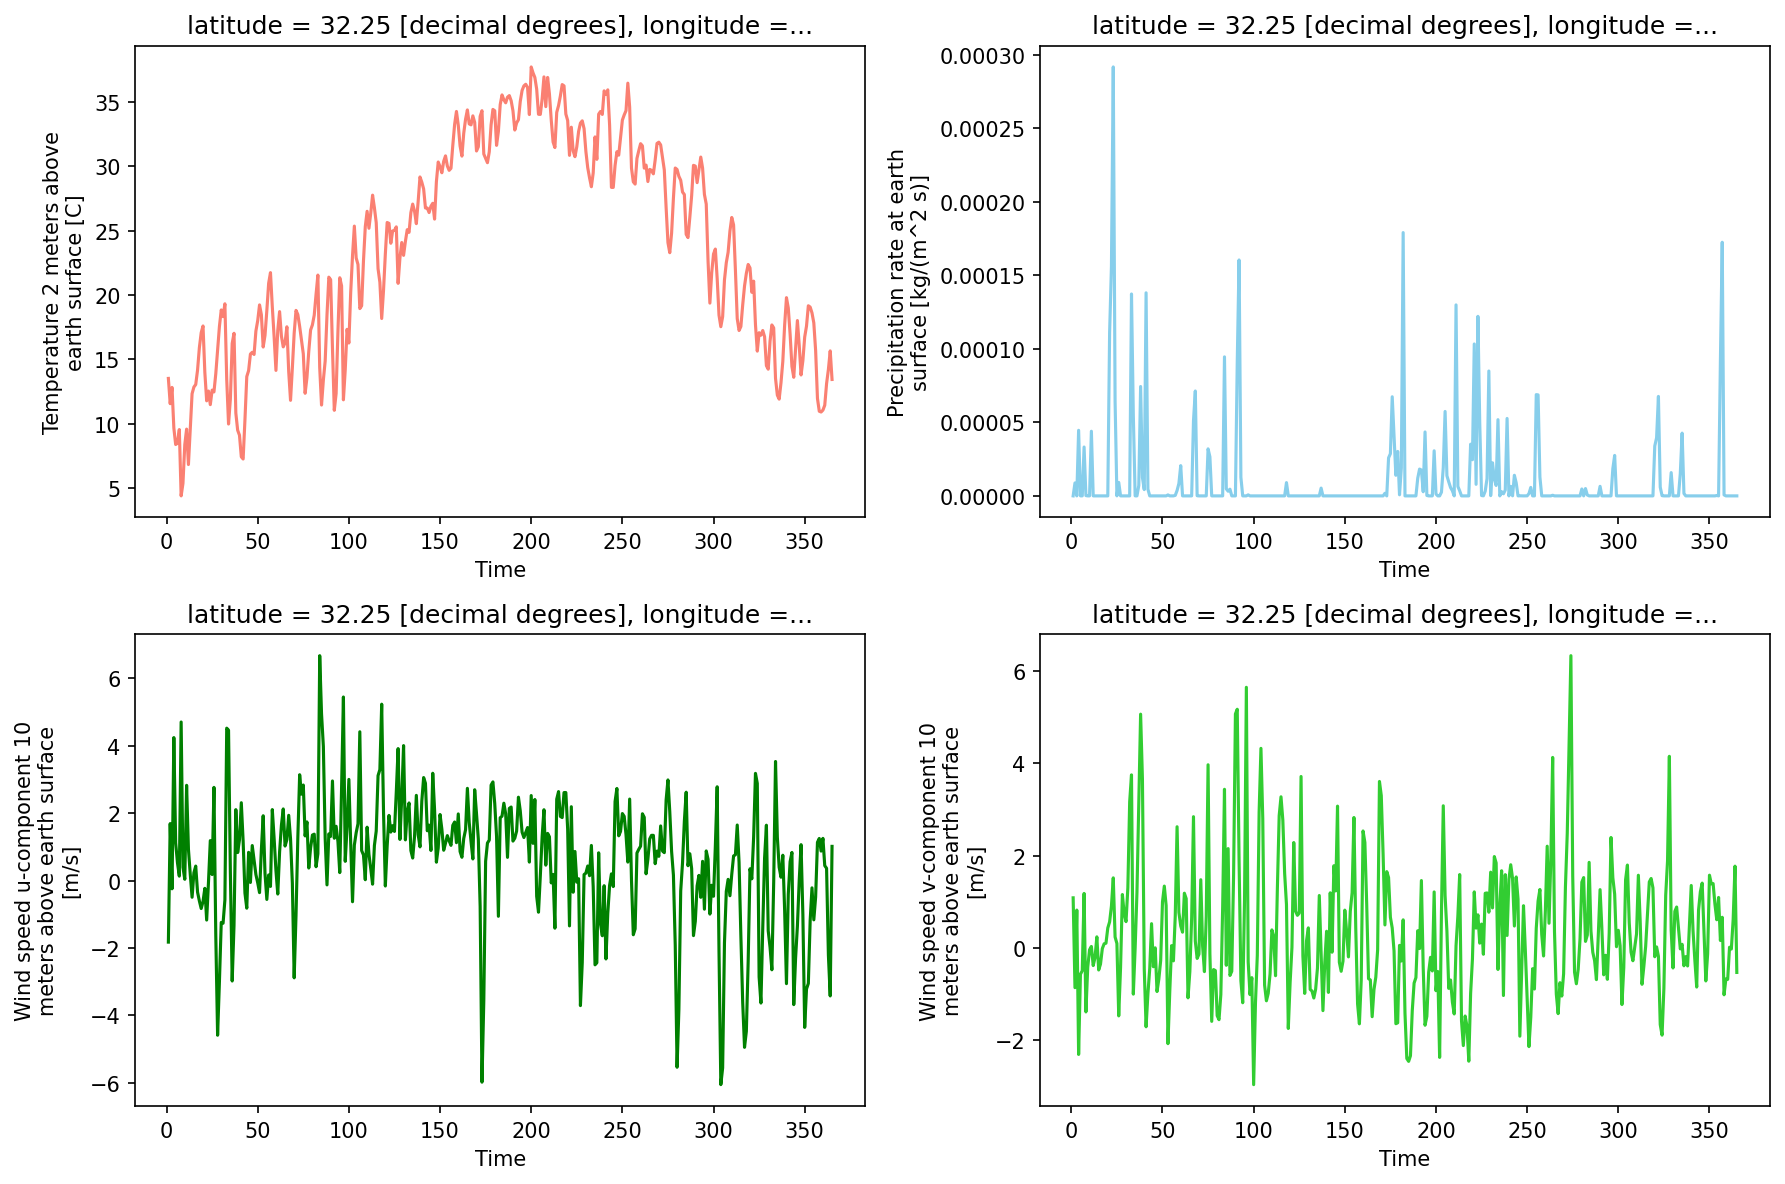

In [5]:
tucson_lat = 32.22
tucson_lon = -110.97
tucson_ds = calculate_climatology(sub_ds, tucson_lat, tucson_lon)
plot_climatology(tucson_ds) 
